# Product comparison

![header](../figures/logos_partenaires_DC_WOC-ESA.jpg)


***
**Authors:** Datlas <br>
**Copyright:** 2023 Datlas <br>
**License:** MIT

<br>

<br>


<div class="alert alert-block alert-success">
<h1><center> <u> Agulhas results </u> </center></h1>  
    


<div class="alert alert-block alert-success"> 
 <h5><center> The notebook aims to evaluate the surface current for all products in the Agulhas region.</center></h5> 

## <u> Compared products </u> 

<h3>
    <ul>  
        <li> GlobCurrent Geostrophic REP </li> 
        <li> GlobCurrent Total REP </li>
        <li> WOC BFN-QG </li>
        <li> WOC inertial global </li>
    </ul>  

</h3>

In [3]:
from glob import glob
import numpy as np
import os
import sys 
sys.path.append('../')
import warnings
import datetime
warnings.filterwarnings("ignore")
sys.path.remove('/Users/sammymetref/Documents/DataChallenges/DC_IW_crossoverCal/2022a_mapping_HFdynamic')

In [4]:
import velocity_metrics.spectrum.spectrum as spectrum
import velocity_metrics.lagrangian.drifters as drifters
import velocity_metrics.utils.constant as const 
import velocity_metrics.eulerian.eulerian_drifters as eulerian 
import velocity_metrics.lagrangian.cumulative_distance as sde
import velocity_metrics.fronts.compare_fronts_vel as compare_fronts_vel
import velocity_metrics.fronts.box_metrics as box_metrics

In [5]:
from src import utils

In [6]:

outputdir = '../results/'


<br>

<br>

## <u> 1. Spectrum </u> 

In [5]:
dir_spectrum = '../dc_data/results-woc/spectrum/'


<br>

<h2>At 0m</h2>

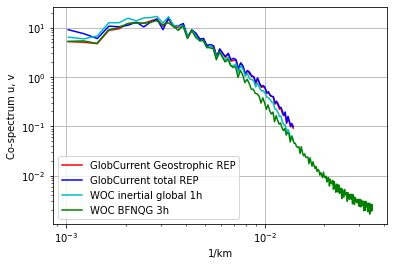

In [6]:
list_spectrum_pickles = [dir_spectrum+'spectrum_008_047_region_T1_0.pyo',
                         dir_spectrum+'spectrum_015_004_region_T1_0.pyo',
                         dir_spectrum+'spectrum_woc-l4-cureul-glob-1h_region_T1_0.pyo',
                         dir_spectrum+'spectrum_woc-l4-curgeo-bfn-3h_region_T1_0.pyo',]

_ = spectrum.plot(list_spectrum_pickles,
                      outfile=outputdir+name_plot,
                      list_color=['r','b','c','g'])

<br>


<h2>At 15m</h2>

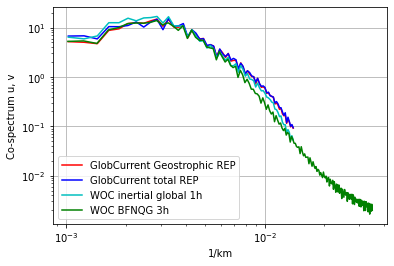

In [7]:
list_spectrum_pickles = [dir_spectrum+'spectrum_008_047_region_T1_1.pyo',
                         dir_spectrum+'spectrum_015_004_region_T1_1.pyo',
                         dir_spectrum+'spectrum_woc-l4-cureul-glob-1h_region_T1_1.pyo',
                         dir_spectrum+'spectrum_woc-l4-curgeo-bfn-3h_region_T1_1.pyo',]

_ = spectrum.plot(list_spectrum_pickles,
                      outfile=outputdir+name_plot,
                      list_color=['r','b','c','g'])

<br>

<br>

## <u> 2. Eulerian RMS </u>

<br>

<h2>At 0m</h2>

<br>

<h3>Mean error</h3>

In [7]:
dir_eulerian = '../dc_data/validation/eulerian_rms/'

In [13]:

list_dict = [{'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_GulfStream_008_047_00/Eulerian_RMS_008_047.pyo','name':'GlobCurrent Geostrophic'},
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_GulfStream_cmems_015_004_00/Eulerian_RMS_015_004.pyo','name':'GlobCurrent Total'}, 
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_GulfStream_woc-l4-cureul-glob-1h_00/Eulerian_RMS_woc-l4-cureul-glob-1h.pyo','name':'Global Inertial'}] 

utils.DictTable(list_dict)  

Mean,Eastward difference,Northward difference,Norm difference,Direction difference,Eastward speed,Northward speed,Field speed,Drifter speed,Percentage difference,Number of Points
GlobCurrent Geostrophic,0.281,0.277,0.287,61.242,0.418,0.398,0.589,0.714,31085377837221.555,106943.000
GlobCurrent Total,0.246,0.254,0.262,57.889,0.445,0.408,0.614,0.715,31378197609907.184,103022.000
Global Inertial,0.275,0.280,0.289,60.027,0.425,0.396,0.590,0.715,20626274283300.547,103008.000


<br>

<br>

<h3>Standard deviation error</h3>

In [14]:

list_dict = [{'type_stat':'std','path':dir_eulerian+'eulerian_rms_GulfStream_008_047_00/Eulerian_STD_008_047.pyo','name':'GlobCurrents Geostrophic'},
             {'type_stat':'std','path':dir_eulerian+'eulerian_rms_GulfStream_cmems_015_004_00/Eulerian_STD_015_004.pyo','name':'GlobCurrents Total'}, 
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_GulfStream_woc-l4-cureul-glob-1h_00/Eulerian_STD_woc-l4-cureul-glob-1h.pyo','name':'Global Inertial'}] 

utils.DictTable(list_dict)  

std,Eastward difference,Northward difference,Norm difference,Direction difference,Eastward speed,Northward speed,Field speed,Drifter speed,Percentage difference,Number of Points
GlobCurrents Geostrophic,0.182,0.179,0.191,42.931,0.402,0.393,0.355,0.427,31085194019743.270,106943.000
GlobCurrents Total,0.165,0.168,0.176,42.638,0.418,0.404,0.363,0.427,31377965676590.633,103022.000
Global Inertial,0.182,0.185,0.194,42.983,0.402,0.391,0.348,0.427,20626114670454.828,103008.000


<br>

<h2>At 15m</h2>

<br>

<h3>Mean error</h3>

In [15]:

list_dict = [{'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_GulfStream_008_047_15/Eulerian_RMS_008_047.pyo','name':'GlobCurrent Geostrophic'},
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_GulfStream_cmems_015_004_15/Eulerian_RMS_015_004.pyo','name':'GlobCurrent Total'}, 
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_GulfStream_woc-l4-cureul-glob-1h_15/Eulerian_RMS_woc-l4-cureul-glob-1h.pyo','name':'Global Inertial'}] 

utils.DictTable(list_dict)  

Mean,Eastward difference,Northward difference,Norm difference,Direction difference,Eastward speed,Northward speed,Field speed,Drifter speed,Percentage difference,Number of Points
GlobCurrent Geostrophic,0.238,0.253,0.266,63.439,0.295,0.290,0.425,0.503,inf,51943.000
GlobCurrent Total,0.234,0.249,0.260,62.516,0.300,0.293,0.431,0.504,inf,50016.000
Global Inertial,0.241,0.252,0.265,62.227,0.307,0.295,0.435,0.504,5131.287,50016.000


<br>

<br>

<h3>Standard deviation error</h3>

In [16]:

list_dict = [{'type_stat':'STD','path':dir_eulerian+'eulerian_rms_GulfStream_008_047_15/Eulerian_STD_008_047.pyo','name':'GlobCurrent Geostrophic'},
             {'type_stat':'STD','path':dir_eulerian+'eulerian_rms_GulfStream_cmems_015_004_15/Eulerian_STD_015_004.pyo','name':'GlobCurrent Total'}, 
             {'type_stat':'STD','path':dir_eulerian+'eulerian_rms_GulfStream_woc-l4-cureul-glob-1h_15/Eulerian_STD_woc-l4-cureul-glob-1h.pyo','name':'Global Inertial'}] 

utils.DictTable(list_dict)  

STD,Eastward difference,Northward difference,Norm difference,Direction difference,Eastward speed,Northward speed,Field speed,Drifter speed,Percentage difference,Number of Points
GlobCurrent Geostrophic,0.162,0.176,0.189,43.028,0.290,0.289,0.280,0.308,nan,51943.000
GlobCurrent Total,0.161,0.175,0.186,42.727,0.293,0.293,0.278,0.309,nan,50016.000
Global Inertial,0.166,0.178,0.191,43.049,0.299,0.294,0.274,0.309,5131.221,50016.000


<br>

<br>

## <u> 3. Lagrangian Cumulative Distance at 0m</u> 

In [11]:
dir_drifter = '../dc_data/drifter/'

dir_advection = '../dc_data/advection/'

drifter_list = [dir_drifter + 'Drifters_AOML_region_GulfStream_00m_20190101T000000Z_20200101T000000Z.pyo.gz']

all_path_artificial_drifters = [dir_advection + 'advection_GulfStream_008_047_00m/data_type_008_047_region_GulfStream_dep0.pyo.gz',
                                dir_advection + 'advection_GulfStream_cmems_015_004_00m/data_type_cmems_015_004_region_GulfStream_dep0.pyo.gz', 
                                dir_advection + 'advection_GulfStream_woc-l4-cureul-glob-1h_00m/data_type_woc-l4-cureul-glob-1h_region_GulfStream_dep0.pyo.gz']

all_outputfilename = ['SDE_region_GulfStream_008_047_00m',
                      'SDE_region_GulfStream_015_004_00m', 
                      'SDE_region_GulfStream_woc-l4-cureul-glob-1h_00m']


In [12]:


for path_artificial_drifters, outputfilename in zip(all_path_artificial_drifters, all_outputfilename):
    
    print(outputfilename)

    _ = sde.run(path_artificial_drifters, drifter_list, output_dir=outputdir, output_filename=outputfilename)


SDE_region_GulfStream_008_047_00m


100%|██████████| 4408/4408 [01:07<00:00, 65.67it/s] 


SDE_region_GulfStream_015_004_00m


100%|██████████| 4407/4407 [01:03<00:00, 69.59it/s] 


SDE_region_GulfStream_woc-l4-cureul-glob-1h_00m


100%|██████████| 4401/4401 [01:10<00:00, 62.47it/s] 


<Figure size 432x288 with 0 Axes>

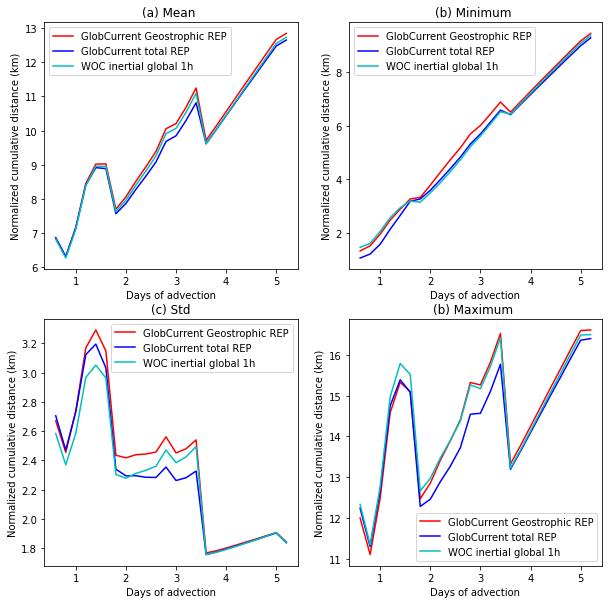

<Figure size 432x288 with 0 Axes>

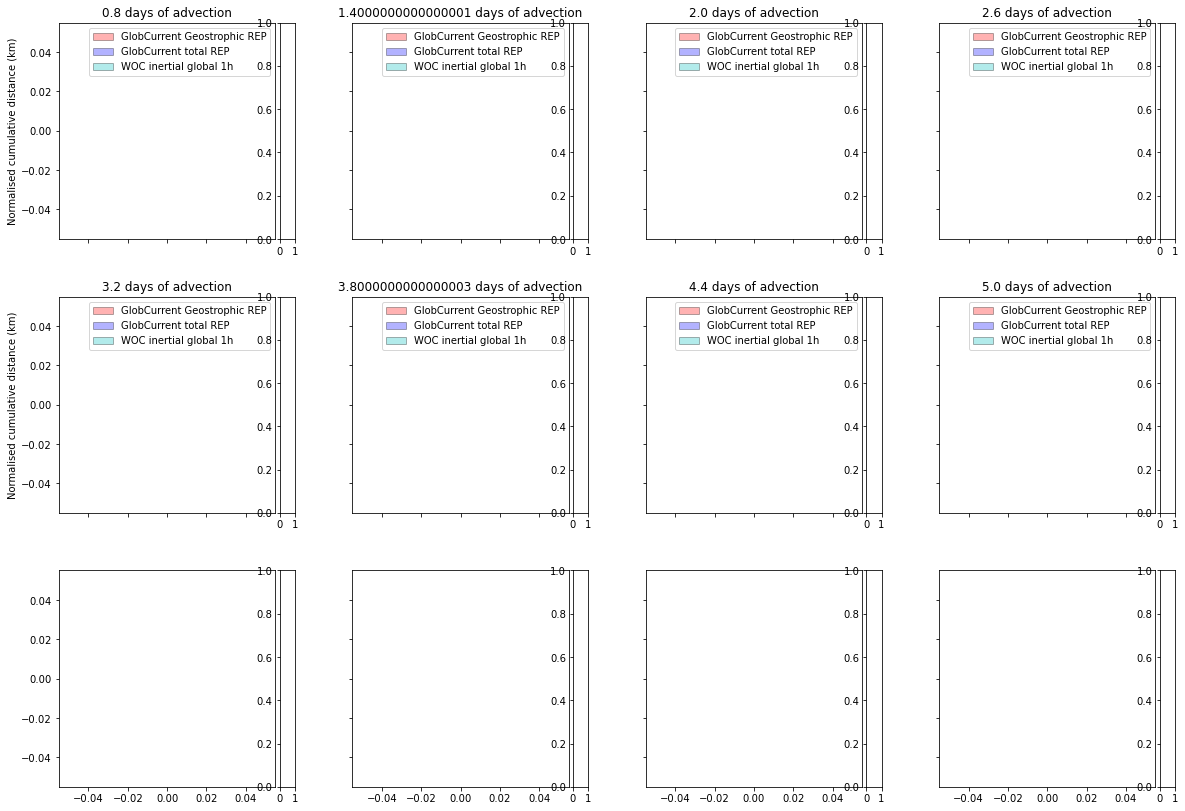

In [13]:
list_sde = [outputdir + output_filename + '.pyo.gz' for output_filename in all_outputfilename]

outputfilename = 'SDE_region_GulfStream_00m.png'

_ = sde.plot(list_sde, output_dir=outputdir, 
             output_filename=outputfilename,
             list_color=['r','b','c','g'])

<br>

<br>

## <u> 3. Lagrangian Cumulative Distance at 15m</u> 

In [20]:
dir_drifter = '../dc_data/drifter/'

dir_advection = '../dc_data/advection/'

drifter_list = [dir_drifter + 'Drifters_AOML_region_GulfStream_15m_20190101T000000Z_20200101T000000Z.pyo.gz']

all_path_artificial_drifters = [dir_advection + 'advection_GulfStream_008_047_15m/data_type_008_047_region_GulfStream_dep1.pyo.gz',
                                dir_advection + 'advection_GulfStream_cmems_015_004_15m/data_type_cmems_015_004_region_GulfStream_dep1.pyo.gz', 
                                dir_advection + 'advection_GulfStream_woc-l4-cureul-glob-1h_15m/data_type_woc-l4-cureul-glob-1h_region_GulfStream_dep1.pyo.gz']

all_outputfilename = ['SDE_region_GulfStream_008_047_15m',
                      'SDE_region_GulfStream_015_004_15m', 
                      'SDE_region_GulfStream_woc-l4-cureul-glob-1h_15m']


In [21]:


for path_artificial_drifters, outputfilename in zip(all_path_artificial_drifters, all_outputfilename):
    
    print(outputfilename)

    _ = sde.run(path_artificial_drifters, drifter_list, output_dir=outputdir, output_filename=outputfilename)


SDE_region_GulfStream_008_047_15m


100%|██████████| 2113/2113 [00:33<00:00, 63.52it/s] 


SDE_region_GulfStream_015_004_15m


100%|██████████| 2113/2113 [00:28<00:00, 73.04it/s] 


SDE_region_GulfStream_woc-l4-cureul-glob-1h_15m


100%|██████████| 2109/2109 [00:28<00:00, 74.81it/s] 


<Figure size 432x288 with 0 Axes>

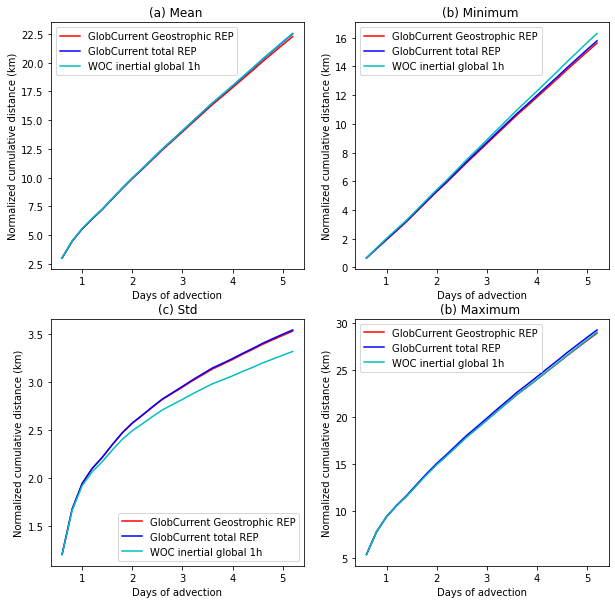

<Figure size 432x288 with 0 Axes>

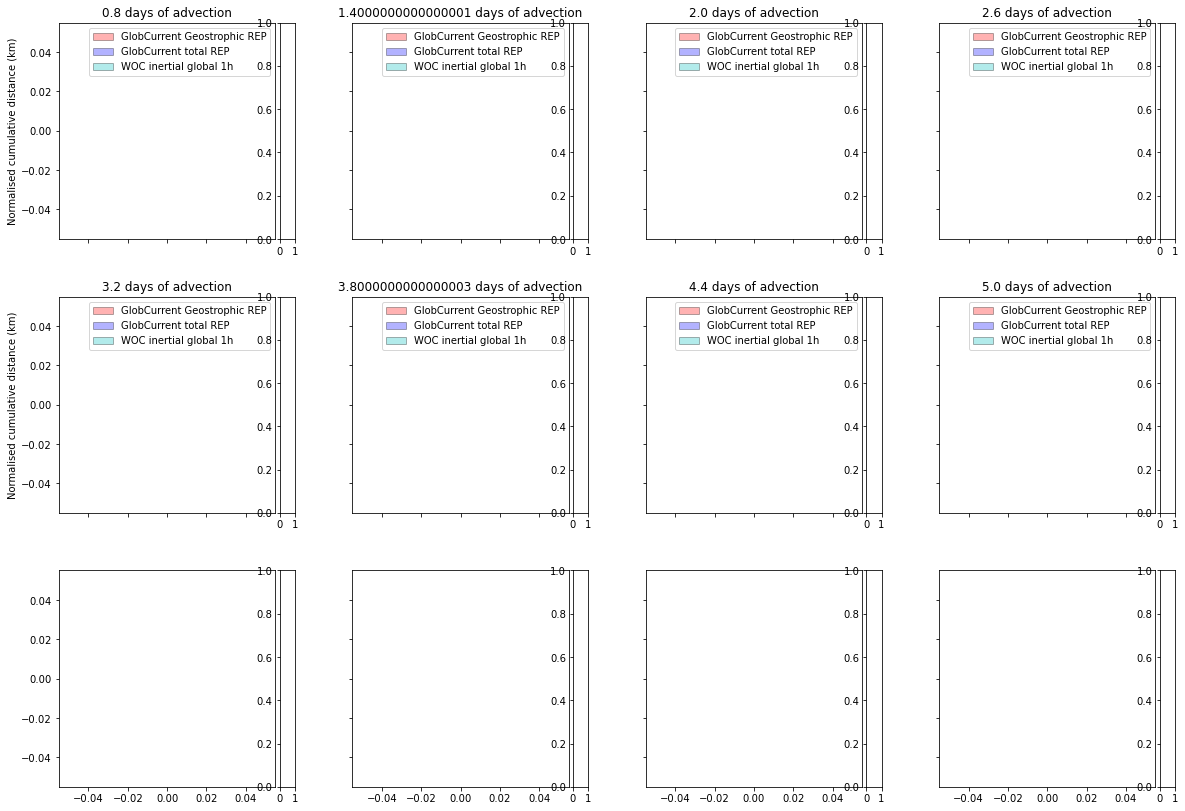

In [22]:
list_sde = [outputdir + output_filename + '.pyo.gz' for output_filename in all_outputfilename]

outputfilename = 'SDE_region_GulfStream_15m.png'

_ = sde.plot(list_sde, output_dir=outputdir, 
             output_filename=outputfilename,
             list_color=['r','b','c','g'])

<br>

<br>

## <u>4. Fronts and currents consistency</u>

In [17]:
dir_fronts = '../dc_data/results-woc/fronts_vel_comparison/'

In [19]:

dic_list = box_metrics.run(dir_fronts+'config_fronts.json', 2, 
                first_date='20190101T000000Z',
                last_date ='20190115T000000Z',
                output_dir=outputdir, 
                plot=False)

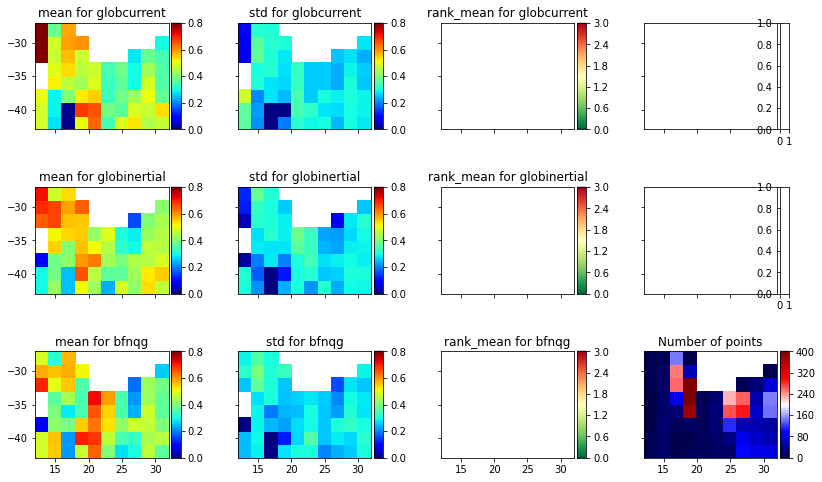

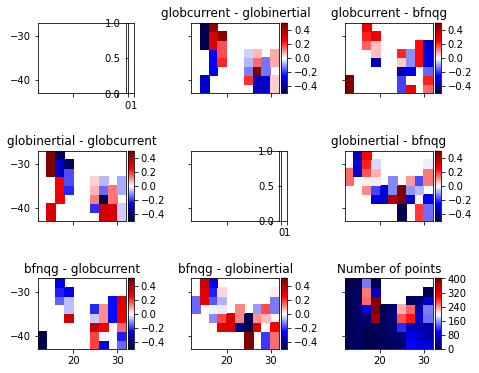

In [23]:
path = outputdir + 'globcurrent_globinertial_bfnqg_2019-01-01T00:00:00.000000Z_2019-01-15T00:00:00.000000Z_mean.nc'

dic_list = box_metrics.run_plot(path, 
                                dir_fronts+'config_fronts.json', 
                                size=2,
                                dir_out=outputdir)

In [31]:
# Save results as a markdown file

! jupyter nbconvert --output-dir='../results'  nb_overall_results-Agulhas.ipynb --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags="['remove_cell', 'other_tag_to_remove']" --to markdown --no-input --no-prompt


[NbConvertApp] Converting notebook nb_overall_results-Agulhas.ipynb to markdown
[NbConvertApp] Support files will be in nb_overall_results-Agulhas_files/
[NbConvertApp] Making directory ../results/nb_overall_results-Agulhas_files
[NbConvertApp] Making directory ../results/nb_overall_results-Agulhas_files
[NbConvertApp] Making directory ../results/nb_overall_results-Agulhas_files
[NbConvertApp] Making directory ../results/nb_overall_results-Agulhas_files
[NbConvertApp] Writing 5105 bytes to ../results/nb_overall_results-Agulhas.md
